In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/EnggQasim/Saylani-AI-Batch3/main/MachineLearning/1_Data_Test_Train_Validation_Qaulitative_Quantitative/2_Regression/data/weight-height.csv",
                usecols=["Height","Weight"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [3]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [4]:
X , Y = df.Height.values, df.Weight.values

In [5]:
X = X.reshape(10000,-1)

In [6]:
print(type(X),len(X),X.shape,X)

<class 'numpy.ndarray'> 10000 (10000, 1) [[73.84701702]
 [68.78190405]
 [74.11010539]
 ...
 [63.86799221]
 [69.03424313]
 [61.94424588]]


In [7]:
print(type(Y),len(Y),Y)

<class 'numpy.ndarray'> 10000 [241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.3,
                                                   shuffle=False)


In [9]:
print("Training Data length:",len(X_train), len(y_train)) # 7K
print("Training Test length:",len(X_test), len(y_test))# 3K

Training Data length: 7000 7000
Training Test length: 3000 3000


# Create Model with SKLearn

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression().fit(X_train, y_train)# .fit(input, output) start training
#after runing above code your model has been trained

In [12]:
y_predect_test = reg.predict(X_test) # just give input data it will provide predicted output

In [13]:
y_predect_train = reg.predict(X_train)
y_predect_train

array([220.04868197, 181.96807788, 222.02663671, ..., 144.41569845,
       124.86239195, 111.08580566])

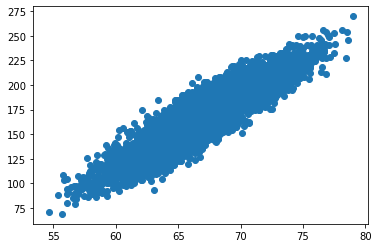

In [14]:
plt.scatter(X_train,y_train)# train Acctual data with actual y
plt.show()

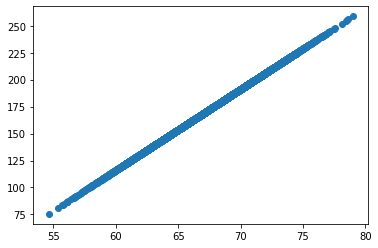

In [15]:
plt.scatter(X_train,y_predect_train)# train Acctual data with actual y
plt.show()

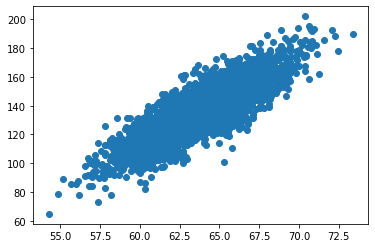

In [16]:
plt.scatter(X_test,y_test)# train Acctual data with actual y Testing data
plt.show()

3000 7000


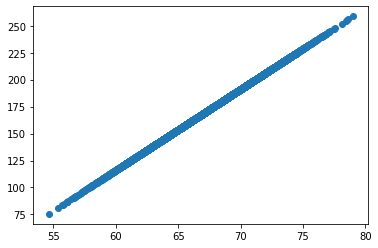

In [17]:
print(len(X_test),len(y_predect_train))
plt.scatter(X_train,y_predect_train)# train Acctual data with actual y Testing data
plt.show()

In [18]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(reg, open(filename, 'wb'))

# Load save model

In [19]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict([[70]])


array([191.12598413])

# get model learning parameters

In [20]:
reg.coef_

array([7.51821416])

In [21]:
reg.intercept_

-335.1490074060423

In [22]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [23]:
reg.score(X_test,y_test)

0.5029095795982501

# Apply Regression on Booston house data

In [46]:
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings():
    # You should probably not use this dataset.
    warnings.filterwarnings("ignore")
    X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


In [47]:
import warnings
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [26]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [27]:
y[0]

24.0

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                   shuffle=False)

In [30]:
boston_house_m = LinearRegression().fit(**{"X":X_train, "y":y_train})

In [31]:
boston_house_m.score(X_test,y_test)

-7.243407441977778

In [32]:
boston_house_m.score(X_train,y_train)

0.8732816456576405

In [33]:
boston_house_m.coef_

array([ 1.29693856,  0.01469497,  0.04050457,  0.79060732, -9.12933243,
        9.24839787, -0.0451214 , -0.91395374,  0.14079658, -0.01477291,
       -0.63369567,  0.01577172, -0.09514128])

# Normalization Technique

* we have to covert each columns values in same range

In [34]:
import numpy as np

# (x-mean)/std for each column

In [35]:
data = np.array([[0.2, 20000, 90],
                [0.9, 1000, 70],
                [0.8, 15000, 50],
                [0.6, 17000, 50],
                [0.2, 13000, 35]])

In [36]:
data

array([[2.0e-01, 2.0e+04, 9.0e+01],
       [9.0e-01, 1.0e+03, 7.0e+01],
       [8.0e-01, 1.5e+04, 5.0e+01],
       [6.0e-01, 1.7e+04, 5.0e+01],
       [2.0e-01, 1.3e+04, 3.5e+01]])

### use library of sklearn for preprocessing

In [37]:
from sklearn import preprocessing

In [38]:
scaler = preprocessing.StandardScaler().fit(data)

In [39]:
scaler

StandardScaler()

In [40]:
scaler.mean_


array([5.40e-01, 1.32e+04, 5.90e+01])

In [41]:
scaler.scale_

array([2.93938769e-01, 6.52380257e+03, 1.90787840e+01])

In [42]:
data

array([[2.0e-01, 2.0e+04, 9.0e+01],
       [9.0e-01, 1.0e+03, 7.0e+01],
       [8.0e-01, 1.5e+04, 5.0e+01],
       [6.0e-01, 1.7e+04, 5.0e+01],
       [2.0e-01, 1.3e+04, 3.5e+01]])

In [43]:
data[0][1]

20000.0

In [44]:
normalized_data = scaler.transform(data)
normalized_data

array([[-1.15670349,  1.04233688,  1.6248415 ],
       [ 1.22474487, -1.87007499,  0.57655666],
       [ 0.88453796,  0.2759127 , -0.47172818],
       [ 0.20412415,  0.58248237, -0.47172818],
       [-1.15670349, -0.03065697, -1.2579418 ]])

In [45]:
normalized_data[0][1]

1.042336877124442